In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Author.csv")
curie_df = pd.read_csv("curie_Author.csv")
davinci_df = pd.read_csv("davinci_Author.csv")
turbo_df = pd.read_csv("turbo_Author.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model', 'Mean F1 Score', 'Mean Rouge1', 'Mean Rouge2', 'Mean RougeL', 'Mean Length', 'Mean Vec2', 'Mean Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_authors.csv", index=False)


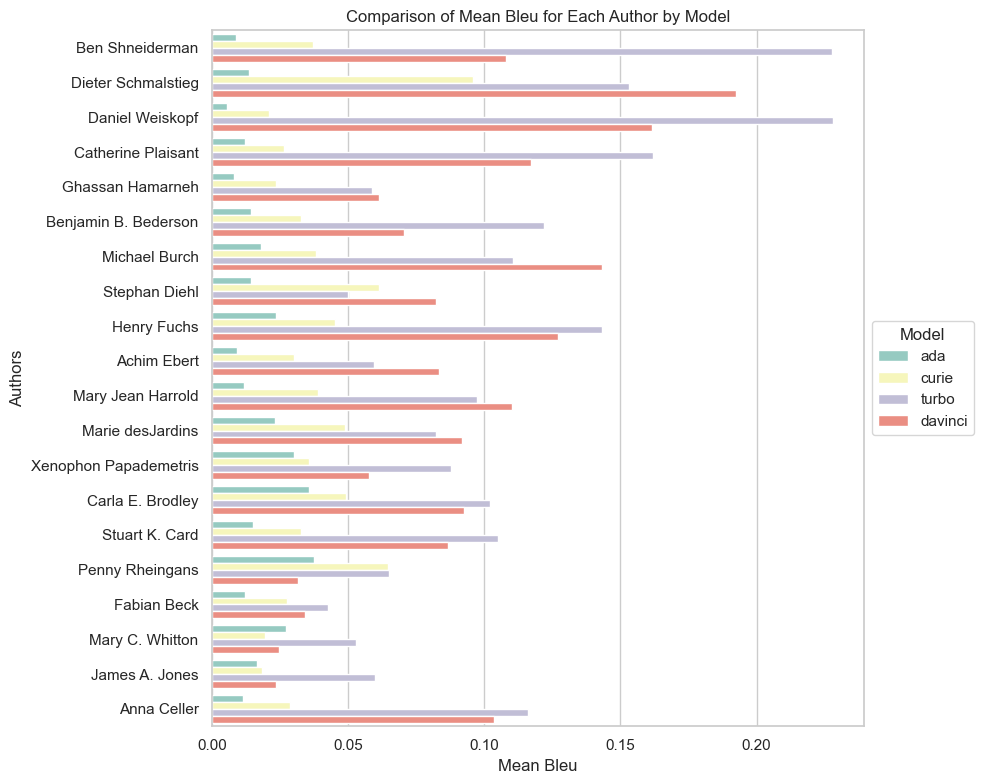

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors_with_publications.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean Bleu'

# Create the grouped horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=data, y='Name', x=selected_metric, hue='Model', palette='Set3')  # Exchange 'x' and 'y' here
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.xlabel(selected_metric)
plt.ylabel('Authors')
plt.legend(title='Model', loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position
plt.tight_layout()
plt.show()


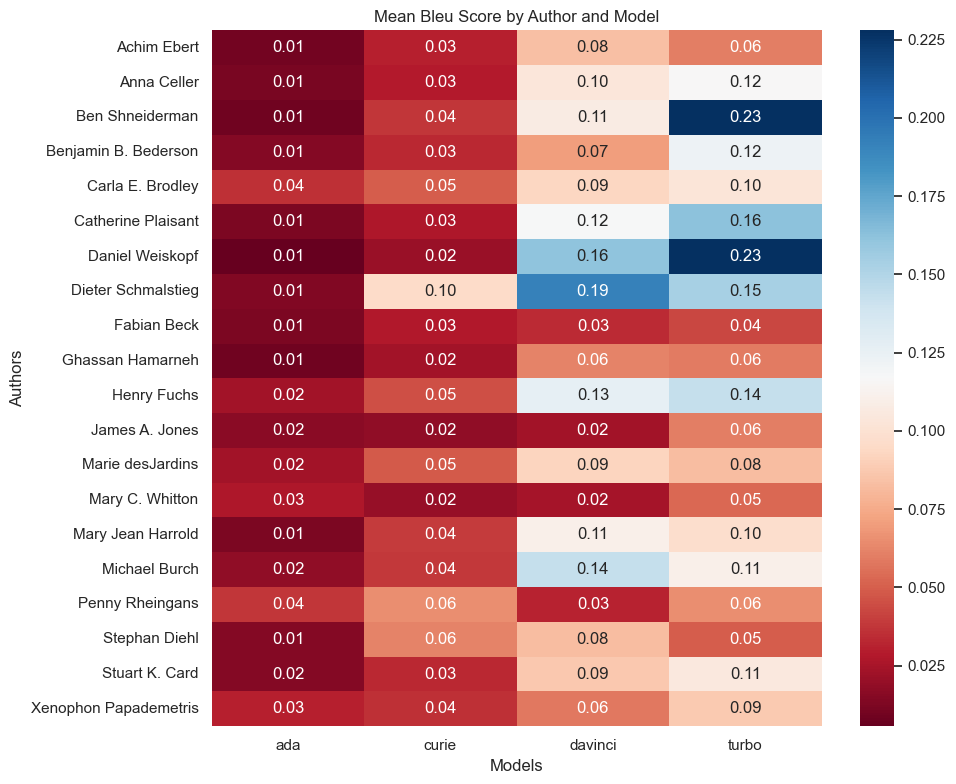

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('p1.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Name', columns='Model', values='Mean Bleu')

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', xticklabels=heatmap_data.columns, yticklabels=heatmap_data.index)  # Change the labels
plt.xlabel('Models')  # Change the label
plt.ylabel('Authors')  # Change the label
plt.title('Mean Bleu Score by Author and Model')  # Adjust the title
plt.tight_layout()

# Show the plot
plt.show()


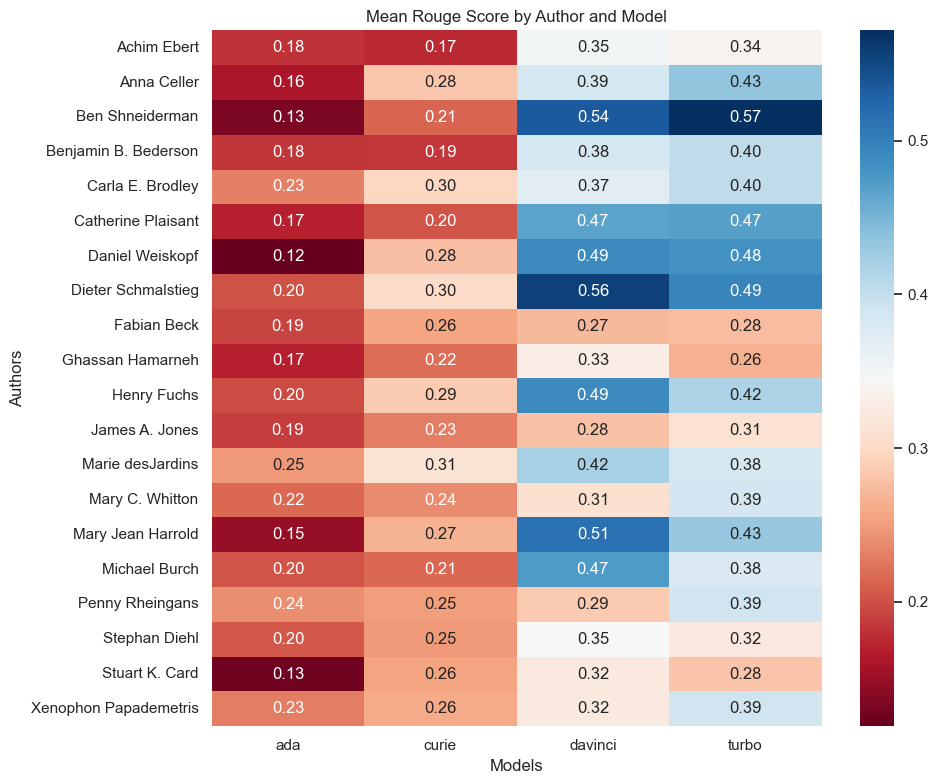

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('p1.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Name', columns='Model', values='Mean RougeL')

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', xticklabels=heatmap_data.columns, yticklabels=heatmap_data.index)  # Change the labels
plt.xlabel('Models')  # Change the label
plt.ylabel('Authors')  # Change the label
plt.title('Mean Rouge Score by Author and Model')  # Adjust the title
plt.tight_layout()

# Show the plot
plt.show()


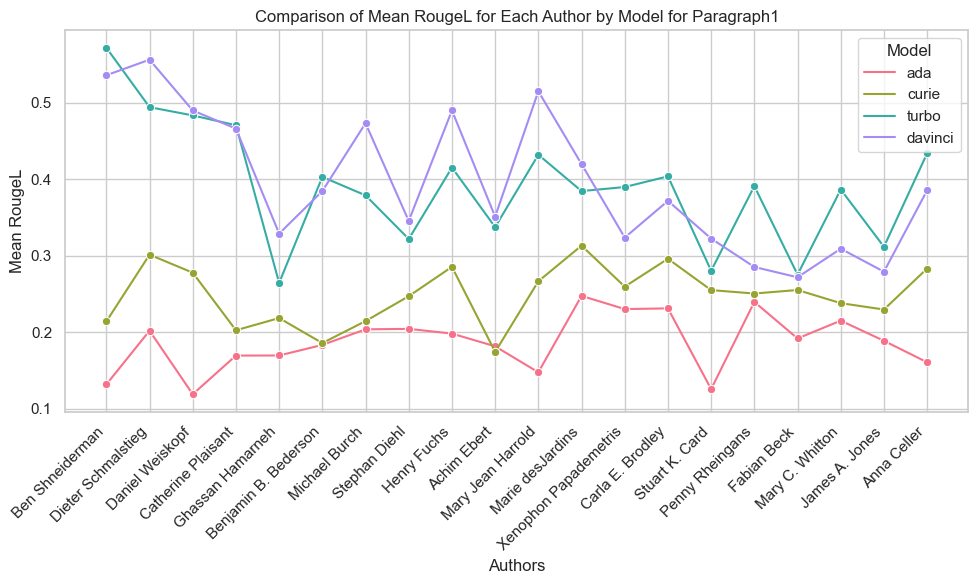

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('p1.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean RougeL'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model for Paragraph1')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper right')
plt.tight_layout()
plt.show()


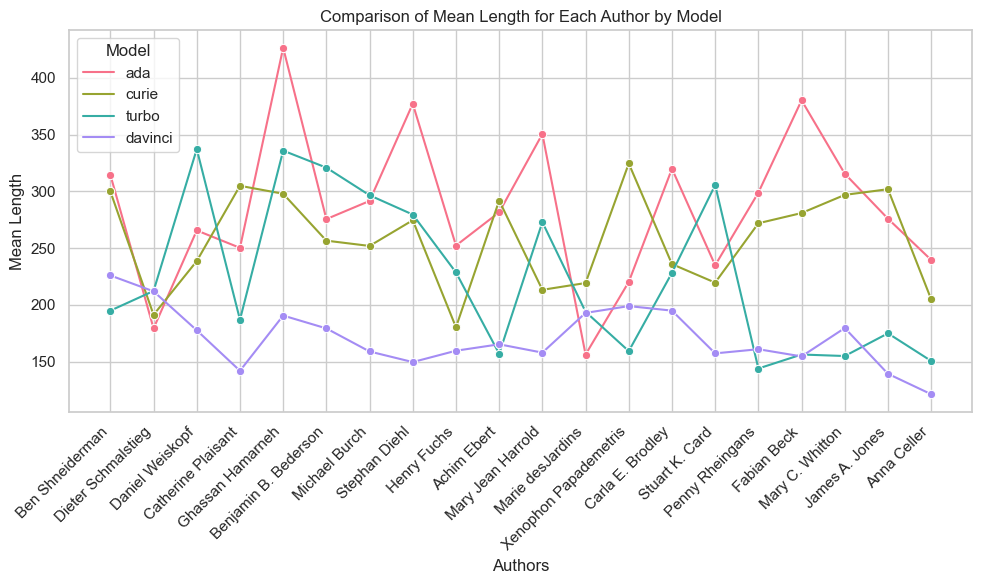

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors_with_publications.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean Length'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


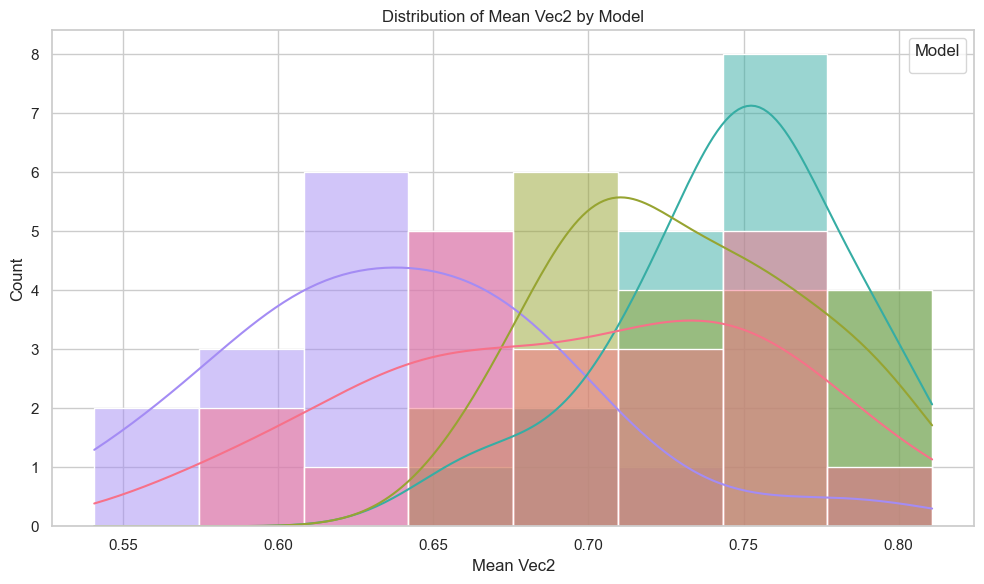

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('p1.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean Vec2'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create a histogram for the selected metric
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=selected_metric, kde=True, hue='Model', palette=custom_palette)
plt.title(f'Distribution of {selected_metric} by Model')
plt.xlabel(selected_metric)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [2]:
#COMBINED TOGETHER WITH PUBLICATIONS
import pandas as pd
import json

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Author.csv")
curie_df = pd.read_csv("curie_Author.csv")
davinci_df = pd.read_csv("davinci_Author.csv")
turbo_df = pd.read_csv("turbo_Author.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Load the JSON data containing publications with the appropriate encoding (e.g., utf-8)
with open("data_authors.json", "r", encoding="utf-8") as json_file:
    publications_data = json.load(json_file)

# Create a DataFrame from the JSON data
publications_df = pd.DataFrame(publications_data)

# Merge the publications DataFrame with the combined DataFrame based on the 'name' column
combined_df = pd.merge(combined_df, publications_df[['name', 'publications']], left_on='Name', right_on='name', how='left')

# Reorder columns for the desired format
column_order = ['Name', 'Model', 'publications', 'Mean F1 Score', 'Mean Rouge1', 'Mean Rouge2', 'Mean RougeL', 'Mean Length', 'Mean Vec2', 'Mean Bleu']
combined_df = combined_df[column_order]

# Sort the DataFrame by the 'publications' column in descending order
combined_df = combined_df.sort_values(by='publications', ascending=False)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_authors_with_publications.csv", index=False)
